### K-means 
- 프로토타입 기반 군집
- 원형 클러스터를 구분하는데 뛰어남
- 사전에 클러스터 개수 k를 지정해야 함
- 엘보우 방법(elbow method)과 실루엣 그래프(silhouette plot)를 통해 최적의 k 결정하는데 도움

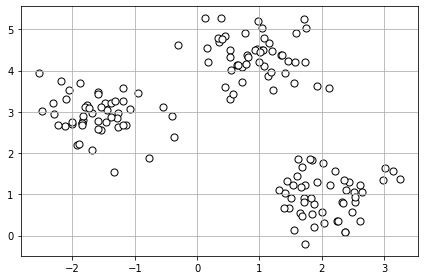

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150,
                 n_features=2,
                 centers=3,
                 cluster_std=0.5,
                 shuffle=True,
                 random_state=0)#2차원 데이터셋

import matplotlib.pyplot as plt
plt.scatter(X[:,0],
           X[:,1],
           c='white',
           marker = 'o',
           edgecolor = 'black',
           s = 50
           )

plt.grid()
plt.tight_layout()
plt.show()#2차원 산점도

#### K-평균 알고리즘
1. 샘플 포인트에서 랜덤하게 k개의 센트로이드를 초기 클러스터 중심으로 선택
2. 각 샘플을 가장 가까운 센트로이드 $\mu^{(i)}, j\in \begin{Bmatrix}
1,\cdot\cdot\cdot,k
\end{Bmatrix}$
3. 할당된 샘플들의 중심으로 센트로이드 이동
4. 클러스터 할당이 변하지 않거나 사용자가 지정한 허용 오차나 최대 반복 횟수에 도달할 때까지 단계 2와 3을 반복

샘플간의 유사도: <b>유클리디안 거리의 제곱(squared Equclidean distance)</b>
<br> x와 y사이의 유클리디안 거리의 제곱<br>
$$d(x,y)^2 = \sum_{j=1}^m (x_j - y_j)^2 = \parallel x- y \parallel_2^2$$

제곱 오차합(SSE) 또는 클러스터 관성(cluster inertia)
$$SSE=\sum_{i=1}^n \sum_{j=1}^k w^{(i,j)}\parallel x^{(i)}-\mu^{(j)}\parallel_2^2$$

<br>$i$: 샘플 인덱스 $j$: 클러스터 인덱스 $\mu^{(j)}$:클러스터 j의 대표 포인트(센트로이드)
<br>샘플 $x^{(i)}$가 클러스터 $j$안에 있다면 $w^{(i,j)}$ = 1, 없다면 $w^{(i,j)}$=0

In [4]:
from sklearn.cluster import KMeans#K-평균 알고리즘
km = KMeans(n_clusters=3,#클러스터 개수
           init= 'random',#기본 k-평균
            n_init=10,#k-평균 알고리즘을 각기 다른 랜덤한 센트로이드에서 독립적으로 10번 실행
            max_iter=300,#한번의 실행에서 수행할 최대 반복 횟수
            tol=1e-04,#수렴을 결정하는 클러스터 내 제곱 오차합의 변화량에 대한 허용 오차 조정
            random_state=0
           )
y_km = km.fit_predict(X)#예측 클러스터 레이블

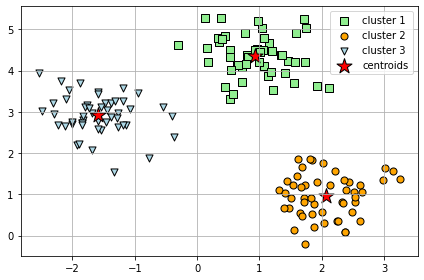

In [5]:
#k-평균이 식별한 클러스터와 클러스터 센트로이드 함께 시각화
plt.scatter(X[y_km == 0,0],
           X[y_km==0,1],
           s=50, c='lightgreen',
           marker='s', edgecolor='black',
           label='cluster 1')#첫번째 클러스터

plt.scatter(X[y_km == 1,0],
           X[y_km == 1,1],
           s=50, c= 'orange',
           marker = 'o', edgecolor = 'black',
           label = 'cluster 2')#두번째 클러스터 

plt.scatter(X[y_km == 2,0],
           X[y_km == 2,1],
           s=50, c= 'lightblue',
           marker = 'v', edgecolor = 'black',
           label = 'cluster 3')#세번째 클러스터

plt.scatter(km.cluster_centers_[:,0],
           km.cluster_centers_[:,1],
           s = 250, marker = '*',
           c = 'red', edgecolor ='black',
           label = 'centroids')#센트로이드

plt.legend(scatterpoints = 1)
plt.grid()
plt.tight_layout()
plt.show()

### K-평균++로 초기 클러스터 센트로이드를 똑똑하게 할당

<b>K-평균++의 초기화</b>
1. 선택한 k개의 센트로이드를 저장할 빈 집합 $M$을 초기화한다.
2. 입력 샘플에서 첫 번째 센트로이드 $\mu^{(i)}$를 랜덤하게 선택하고 $M$에 할당
3. $M$에 있지 않은 각 샘플 $x^{(i)}$에 대해 $M$에 있는 센트로이드까지 최소 제곱 거리 $d(x^{(i)},M)^2$을 찾음
4. 다음 식과 같은 가중치가 적용된 확률 분포를 사용하여 다음 센트로이드 $\mu^{(p)}$를 랜덤하게 선택
<br>

$$\frac{d(\mu^{(p)},M)^2}{\sum\nolimits_i d(x^{(i)},M)^2}$$

<br>
5. $k$개의 센트로이드를 선택할 때까지 단계 3과 4를 반복
6. 그다음 기본 k-평균 알고리즘 수행

### 직접 군집(Hard clustering) vs. 간접 군집(Soft clustering)
- 직접 군집(k-평균 알고리즘): 데이터 셋의 샘플이 정확히 하나의 클러스터에 할당되는 알고리즘
- 간접 군집(퍼지 군집): 샘플을 하나 이상의 클러스터에 할당

<br>

$\mu$: 센트로이드<br>
<center>K-평균에서의 샘플 x의 소속: 이진 희소 벡터로 표현</center>
<br>
$$\begin{pmatrix}
\mu^{(1)} \rightarrow 0\\
\mu^{(2)} \rightarrow 1\\
\mu^{(3)}\rightarrow 0
\end{pmatrix}$$

<br><br>

<center>FCM 클래스 소속 벡터: 각 클러스터 센트로이드의 확률</center>
<br>
$$\begin{pmatrix}
\mu^{(1)} \rightarrow 0.10\\
\mu^{(2)} \rightarrow 0.85\\
\mu^{(3)}\rightarrow 0.05
\end{pmatrix}$$

합:1<br><br>

<b>FCM 알고리즘</b>
1. 센트로이드 개수 $k$를 지정하고 랜덤하게 각 포인트에 대해 클러스터 확률을 할당
2. 클러스터 센트로이드 $\mu^{(j)}, j\in \begin{Bmatrix}
1,\cdot\cdot\cdot,k
\end{Bmatrix}$
3. 각 샘플에 대해 클러스터 소속 확률을 업데이트
4. 클러스터 확률이 변하지 않거나 사용자가 지정한 허용오차나 최대 반복횟수에 도달할 때까지 단계 2와 3을 반복
<br><br>

<center> FCM의 목적함수</center>
$$J_m = \sum_{i=1}^n\sum_{j=1}^k w^{m(i,j)} \parallel x^{(i)} - \mu^{(j)} \parallel_2^2$$



### 엘보우 방법을 사용하여 최적의 클러스터 개수 찾기

In [6]:
print("왜곡: %.2f"%km.inertia_)#SSE계산

왜곡: 72.48


In [7]:
#엘보우 방법으로 최선인 클러스터 개수 k 추정
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i,#K개
               init = 'k-means++',
               n_init=10,#k-평균 알고리즘을 각기 다른 랜덤한 센트로이드에서 독립적으로 10번 실행
               max_iter=300,#한번의 실행에서 수행할 최대 반복 횟수
               random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)#SSE계산

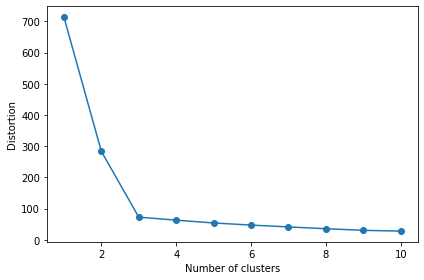

In [8]:
plt.plot(range(1,11),distortions,marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()#K=3이 좋은 선택임을 알 수 있음(왜곡이 빠르게 증가하는 지점이 엘보우)
#클래스 내 SSE를 사용한 엘보우 그래프

### 실루엣 그래프(silhouette analysis)로 군집 품질을 정량화

<b>실루엣 계수 계산</b>
1. 샘플 $x^{(i)}$와 동일한 클러스터 내 모든 다른 포인트 사이의 거리를 평균하여 <b>클러스터 응집력(cluster cohesion)</b>$a^{(i)}$를 계산
2. 샘플 $x^{(i)}$와 가장 가까운 클러스터의 모든 샘플 간 평균 거리로 최근접 클러스터의 <b>클러스터 분리도(cluster separation)</b>$b^{(i)}$를 계산
3. 클러스터 응집력과 분리도 사이의 차이를 둘 중 큰 값으로 나누어 실루엣 $s^{(i)}$를 다음과 같이 계산

$$s^{(i)} = \frac{b^{(i)} - a^{(i)}}{max(b^{(i)},a^{(i)})}$$
<br>
실루엣 계수는 -1과 1 사이의 값을 가짐<br>
$b^{(i)}$: 샘플이 다른 클러스터와 얼마나 다른지<br>
$a^{(i)}$: 클러스터 내 다른 샘플과 얼마나 비슷한지<br>

In [9]:
#실루엣 계수 그래프 그리기
km = KMeans(n_clusters=3,#3개 클러스터
           init='k-means++',#k-평균++
           n_init=10,#k-평균 알고리즘을 각기 다른 랜덤한 센트로이드에서 독립적으로 10번 실행
            max_iter=300,#한번의 실행에서 수행할 최대 반복 횟수
            tol = 1e-04,#수렴을 결정하는 클러스터 내 제곱 오차합의 변화량에 대한 허용 오차 조정
            random_state=0
           )
y_km = km.fit_predict(X)#예측

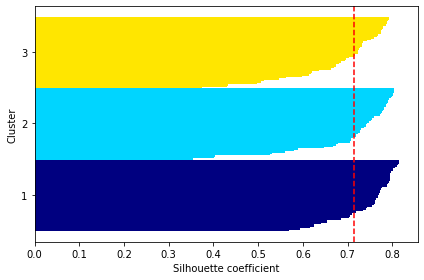

In [10]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples#실루엣 계수
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,y_km,metric='euclidean')
y_ax_lower,y_ax_upper = 0,0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper),
            c_silhouette_vals,
            height=1.0,
            edgecolor = 'none',
            color = color)
    yticks.append((y_ax_lower + y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
           color = 'red',
           linestyle = '--')
plt.yticks(yticks, cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()#실루엣 그래프를 통해 클러스터 크기를 학습하고 이상치를 가진 클러스터를 구별할 수 있음

In [11]:
#나쁜 군집에서의 실루엣 그래프 모양
km = KMeans(n_clusters = 2,
           init = "k-means++",
           n_init=10,
           max_iter=300,
           tol = 1e-04,
           random_state=0)
y_km = km.fit_predict(X)

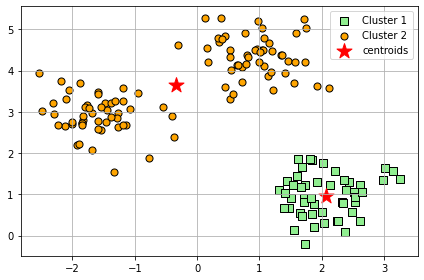

In [12]:
plt.scatter(X[y_km == 0,0],
           X[y_km == 0,1],
           s = 50, c = 'lightgreen',
           edgecolor = 'black',
           marker = 's',
           label = 'Cluster 1')

plt.scatter(X[y_km == 1,0],
           X[y_km == 1,1],
           s = 50,
           c = 'orange',
            edgecolor='black',
           marker = 'o',
           label = 'Cluster 2')

plt.scatter(km.cluster_centers_[:,0],
           km.cluster_centers_[:,1],
           s = 250,
           marker = '*',
           c = 'red',
           label ='centroids')

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()#클러스터 시각화(나쁜 예)

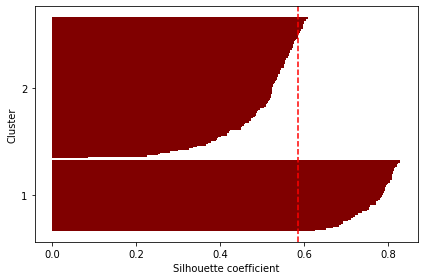

In [13]:
#실루엣 그래프 그리기(나쁜 예)
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,y_km, metric = 'euclidean')

y_ax_lower, y_ax_upper = 0,0
yticks = []
for im, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            c_silhouette_vals,
            height=1.0,
            edgecolor = 'none',
            color = color)
    yticks.append((y_ax_lower+y_ax_upper)/2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color = "red", linestyle = "--")
plt.yticks(yticks, cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()#깊이와 두께가 확연히 다름

### 거리 행렬에서 계층 군집 수행

In [14]:
#거리행렬 계산방법
import pandas as pd
import numpy as np
np.random.seed(123)
variables = {'X','Y','Z'}#샘플 특성
labels = ['ID_0','ID_1','ID_2','ID_3','ID_4']#샘플
X = np.random.random_sample([5,3])*10#랜덤한 샘플 데이터
df = pd.DataFrame(X,columns = variables, index = labels)
df

,Y,Z,X
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [15]:
from scipy.spatial.distance import pdist, squareform#거리행렬 계산 pdist
row_dist = pd.DataFrame(squareform(#샘플 간 거리 대칭 행렬
    pdist(df, metric='euclidean')),#pdist: 축약된 거리행렬 반환
                        columns=labels, index = labels#특성 X,Y,Z를 기반으로 데이터 셋 모든 샘플 쌍의 유클리디안 거리 계산
                       )
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [16]:
from scipy.cluster.hierarchy import linkage#연결 행렬
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.
    
    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents t

In [17]:
#잘못된 방식
from scipy.cluster.hierarchy import linkage
row_clusters = linkage(row_dist,#squareform이라서 상삼각 행렬 아님 -> 잘못된 결과 얻음
                      method = 'complete',
                      metric = 'euclidean')

<ipython-input-17-a6ba13acb9ee>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  row_clusters = linkage(row_dist,#squareform이라서 상삼각 행렬 아님 -> 잘못된 결과 얻음


In [18]:
#올바른 방식
row_clusters = linkage(pdist(df, metric='euclidean'),#올바른 연결 행렬(축약된 거리 행렬 사용)
                      method = 'complete')

In [19]:
#올바른 방식
row_clusters = linkage(df.values,#원본 샘플 행렬 사용 -> 원하는 연결 행렬 얻음
                       method = 'complete',
                       metric = 'euclidean'
                      )

In [20]:
#군집 결과를 자세히 살펴보기 위해 군집 결과를 판다스 DataFrame으로 반환
pd.DataFrame(row_clusters,#DataFrame으로 반환
            columns=['row label 1',
                    'row label 2',
                    'distance',
                    'no. of items in clust.'],
            index = ['cluster %d'%(i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


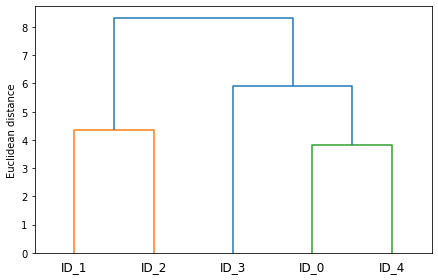

In [21]:
#덴드로그램
from scipy.cluster.hierarchy import dendrogram#덴드로그램
row_rendr = dendrogram(row_clusters,
                      labels = labels,
                      )
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

### 히트맵에 덴드로그램 연결

<ipython-input-32-baec915aaa4a>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_xticklabels(['']+list(df_rowclust.columns))
<ipython-input-32-baec915aaa4a>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_yticklabels(['']+list(df_rowclust.index))


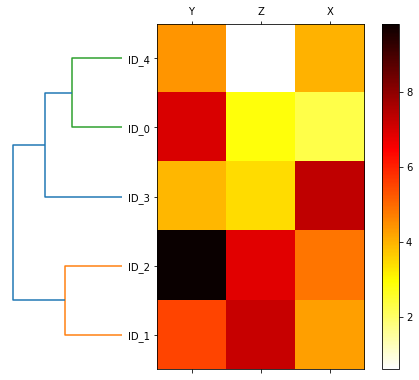

In [32]:
fig = plt.figure(figsize=(8,8),facecolor = 'white')
axd = fig.add_axes([0.09, 0.1, 0.2,0.6])#덴드로그램의 x축 위치, y축 위치, 너비, 높이 지정
row_dendr = dendrogram(row_clusters, orientation='left')#반시계방향으로 90도 회전

#leaves 키에서 얻은 클러스터 레이블을 다라 원본 데이터 재정렬
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

axm = fig.add_axes([0.23, 0.1,0.6,0.6])
cax = axm.matshow(df_rowclust,#히트맵을 만들고
                 interpolation = 'nearest',cmap='hot_r')#덴드로그램 다음에 위치시킴

axd.set_xticks([])#축 눈금 제거
axd.set_yticks([])#축 눈금 제거
for i in axd.spines.values():
    i.set_visible(False)

fig.colorbar(cax)#컬러 막대 추가
axm.set_xticklabels(['']+list(df_rowclust.columns))
axm.set_yticklabels(['']+list(df_rowclust.index))
plt.show()#덴드로그램과 히트맵 함께 출력

### 사이킷런에서 병합 군집 적용

In [34]:
from sklearn.cluster import AgglomerativeClustering#병합 군집(사이킷 런)
ac = AgglomerativeClustering(n_clusters=3,#클러스터 개수
                            affinity='euclidean',#유클리디안 거리 측정 기반
                            linkage='complete')#완전 연결
labels = ac.fit_predict(X)#예측
print("클러스터 레이블: %s"%labels)

클러스터 레이블: [1 0 0 2 1]


In [35]:
ac = AgglomerativeClustering(n_clusters=2,
                            affinity='euclidean',
                            linkage='complete')
labels = ac.fit_predict(X)#예측
print("클러스터 레이블: %s"%labels)#ID_3이 ID_1이나 ID_2보다 ID_4와 ID_0에 더 가까움

클러스터 레이블: [0 1 1 0 0]


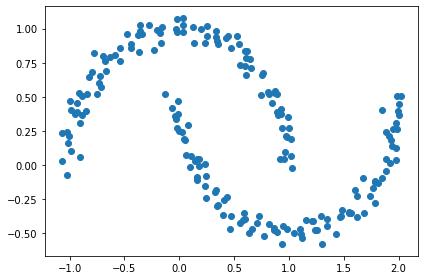

In [36]:
from sklearn.datasets import make_moons#반달 모양 형태의 데이터셋
X,y = make_moons(n_samples=200,
                noise = 0.05,
                random_state=0)
plt.scatter(X[:,0],X[:,1])
plt.tight_layout()
plt.show()

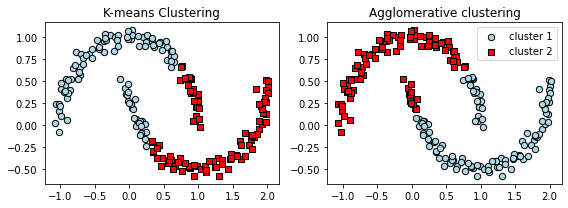

In [39]:
f, (ax1, ax2) = plt.subplots(1,2,figsize = (8,3))
km = KMeans(n_clusters=2,
           random_state=0)#K-평균 알고리즘
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0,0],
           X[y_km==0,1],
           c = 'lightblue',
           edgecolor = 'black',
           marker = 'o',
           s = 40,
           label = 'cluster 1')

ax1.scatter(X[y_km == 1,0],
           X[y_km==1,1],
           c='red',
           edgecolor = 'black',
           marker = 's',
           s=40,
           label = 'cluster 2')

ax1.set_title('K-means Clustering')
ac = AgglomerativeClustering(n_clusters=2,
                            affinity='euclidean',
                            linkage='complete')#완전 연결 병합 군집 알고리즘




y_ac = ac.fit_predict(X)

ax2.scatter(X[y_ac == 0,0],
           X[y_ac==0,1],
           c='lightblue',
           edgecolor = 'black',
           marker = 'o',
           s=40,
           label = 'cluster 1')

ax2.scatter(X[y_ac==1,0],
           X[y_ac ==1,1],
           c = 'red',
           edgecolor = 'black',
           marker = 's',
           s = 40,
           label = 'cluster 2')

ax2.set_title('Agglomerative clustering')
plt.legend()
plt.tight_layout()
plt.show()

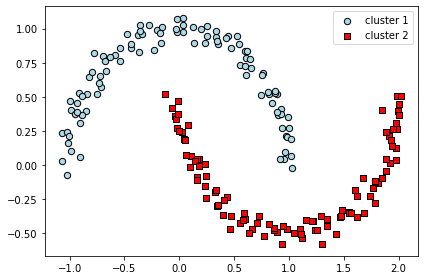

In [40]:
from sklearn.cluster import DBSCAN #DBSCAN알고리즘

db = DBSCAN(eps = 0.2,
           min_samples=5,#이게 뭘까?
           metric= 'euclidean')

y_db = db.fit_predict(X)

plt.scatter(X[y_db == 0,0],
           X[y_db == 0,1],
           c = 'lightblue',
           edgecolor = 'black',
           marker = 'o',
           s = 40,
           label = 'cluster 1')

plt.scatter(X[y_db == 1,0],
           X[y_db == 1,1],
           c = 'red',
           edgecolor = 'black',
           marker = 's',
           s = 40,
           label = 'cluster 2')

plt.legend()
plt.tight_layout()
plt.show()